In [1]:
import pandas as pd

# Load the Excel file
data = pd.read_excel("github_fetched_data.xlsx")

# Display the first few rows
print(data.head())

# Check basic info
print(data.info())
print(data.describe())

#frequency is
#Frequency is derived from the number of active weeks in which a contributor has made at least one contribution
#frequency refers to how often a contributor makes contributions (commits, pull requests, etc.) to the repository over a given time period

   Contributor First Contribution    Last Contribution  Total Contributions  \
0       geekan         2023-06-25  2024-05-12 00:00:00                  530   
1  garylin2099         2023-07-23  2024-10-27 00:00:00                  378   
2    better629         2023-07-23  2025-03-09 00:00:00                  428   
3    stellaHSR         2023-07-16  2024-04-07 00:00:00                  194   
4        seehi         2023-07-23  2025-03-09 00:00:00                  268   

   Frequency Retention (weeks)   Experience  Status      First Activity  \
0         28                46  Experienced  Active 2023-06-25 00:00:00   
1         54                66  Experienced  Active 2023-07-23 00:00:00   
2         33                85  Experienced  Active 2023-07-21 06:44:39   
3         24                38  Experienced  Active 2023-07-16 00:00:00   
4         40                85  Experienced  Active 2023-07-22 04:34:05   

         Last Activity  ...  Stars Forks  Total Issues  Total Pull Request

In [23]:
data['Retention (weeks)'] = pd.to_numeric(data['Retention (weeks)'], errors='coerce')

In [27]:
data.describe()

,Total Contributions,Frequency,Retention (weeks),Stars,Forks,Total Issues,Total Pull Requests,Total Files,Lines of Code,Contributors,Open Issues,Closed Issues,Issue Resolution Ratio (%)
count,3465.000000,3465.000000,3265.000000,3465.000000,3465.000000,3465.000000,3465.000000,3465.000000,3.465000e+03,3465.000000,3465.000000,3465.000000,3465.000000
mean,66.785570,11.593362,53.082389,32307.159596,4323.099856,423.209524,3431.916595,2553.288600,6.973423e+05,249.833189,423.209524,7034.055411,91.600810
std,517.095145,38.447769,110.529911,14957.922201,5137.368869,521.269727,6354.248594,7175.380239,2.099175e+06,118.736251,521.269727,9804.122087,7.684207
min,1.000000,0.000000,0.000000,2388.000000,633.000000,0.000000,121.000000,11.000000,6.907000e+03,15.000000,0.000000,461.000000,53.784057
25%,1.000000,1.000000,0.000000,26539.000000,1526.000000,113.000000,779.000000,413.000000,7.628000e+04,162.000000,113.000000,1838.000000,88.581624
50%,3.000000,2.000000,3.000000,28878.000000,2996.000000,185.000000,1239.000000,796.000000,2.117840e+05,275.000000,185.000000,2542.000000,93.632196
75%,10.000000,5.000000,54.000000,31076.000000,5453.000000,611.000000,3894.000000,1462.000000,3.089020e+05,345.000000,611.000000,9843.000000,96.933086
max,18767.000000,785.000000,1060.000000,110139.000000,30978.000000,2221.000000,36276.000000,41819.000000,1.250350e+07,454.000000,2221.000000,53022.000000,100.000000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [42]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Missing Data:
 Contributor                     0
First Contribution              0
Last Contribution               0
Total Contributions             0
Frequency                       0
Retention (weeks)               0
Experience                      0
Status                          0
First Activity                  0
Last Activity                   0
Lifespan (days)                 0
Repository Name               200
Stars                           0
Forks                           0
Total Issues                    0
Total Pull Requests             0
Total Files                     0
Lines of Code                   0
Contributors                    0
Open Issues                     0
Closed Issues                   0
Issue Resolution Ratio (%)      0
dtype: int64
Number of duplicates: 0


In [46]:
numeric_cols = data.select_dtypes(include=['float64', 'int64'])
print(numeric_cols.describe())


       Total Contributions    Frequency  Retention (weeks)          Stars  \
count          3465.000000  3465.000000        3465.000000    3465.000000   
mean             66.785570    11.593362          53.082389   32307.159596   
std             517.095145    38.447769         107.291657   14957.922201   
min               1.000000     0.000000           0.000000    2388.000000   
25%               1.000000     1.000000           0.000000   26539.000000   
50%               3.000000     2.000000           5.000000   28878.000000   
75%              10.000000     5.000000          53.082389   31076.000000   
max           18767.000000   785.000000        1060.000000  110139.000000   

              Forks  Total Issues  Total Pull Requests   Total Files  \
count   3465.000000   3465.000000          3465.000000   3465.000000   
mean    4323.099856    423.209524          3431.916595   2553.288600   
std     5137.368869    521.269727          6354.248594   7175.380239   
min      633.00000

In [47]:
print(data['Repository Name'].dtype)

object


In [48]:
print(data['Repository Name'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
3460    False
3461    False
3462    False
3463    False
3464    False
Name: Repository Name, Length: 3465, dtype: bool


In [49]:
mean_value = data['Retention (weeks)'].mean()
data['Retention (weeks)'].fillna(mean_value, inplace=True)

In [50]:
categorical_cols = data.select_dtypes(include=['object'])
print(categorical_cols.describe())


            Contributor  Last Contribution Experience   Status  \
count              3465               3465       3465     3465   
unique             3234                668          4      172   
top     dependabot[bot]                  1        New  Passive   
freq                 18                 79       2371     2801   

              Last Activity  Lifespan (days) Repository Name  
count                  3465             3465            3265  
unique                 2352             1053              39  
top     2024-12-29 00:00:00                0  geekan/MetaGPT  
freq                     41              299             100  


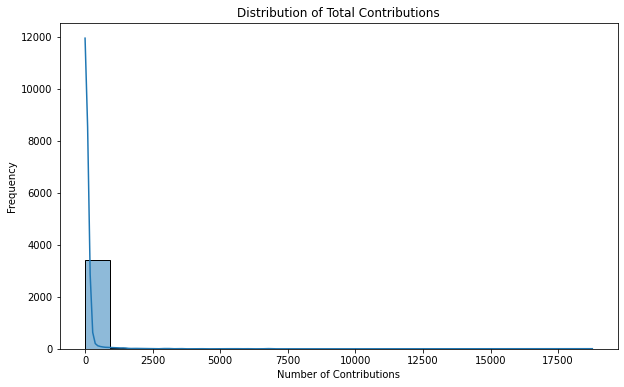

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Total Contributions'], kde=True, bins=20)
plt.title("Distribution of Total Contributions")
plt.xlabel("Number of Contributions")
plt.ylabel("Frequency")
plt.show()

In [91]:
# plt.figure(figsize=(8, 5))
# sns.countplot(data=data, x='Status', palette='Set2')
# plt.title("Active vs. Passive Contributors")
# plt.xlabel("Type")
# plt.ylabel("Count")
# plt.show()

In [53]:
print(data['Status'].dtype)
print(data['Status'].isnull().sum())


object
0


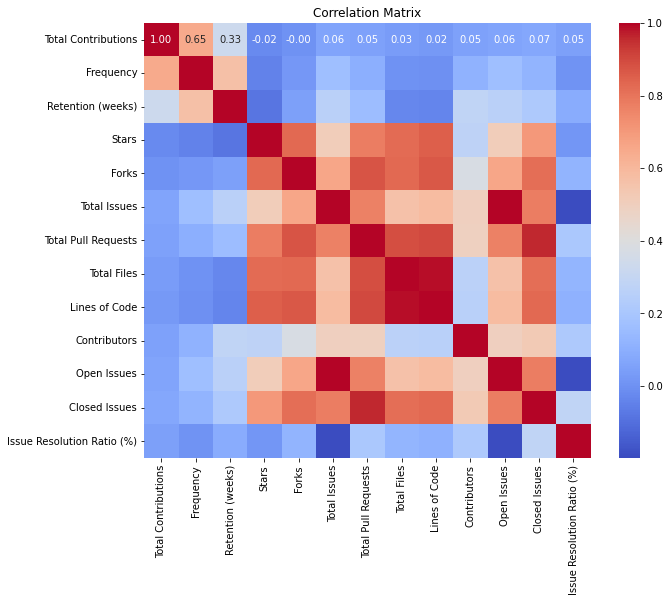

In [54]:
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

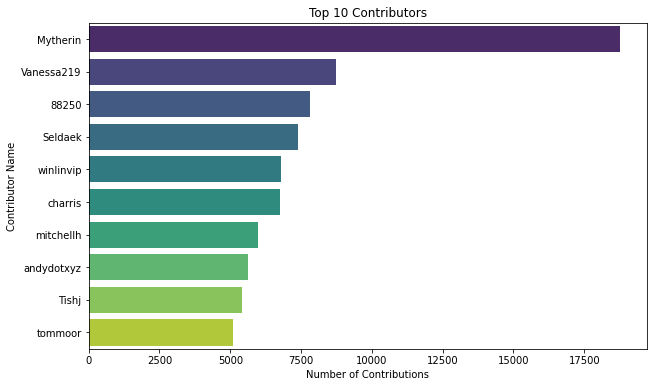

In [55]:
top_contributors = data.nlargest(10, 'Total Contributions')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_contributors, x='Total Contributions', y='Contributor', palette='viridis')
plt.title("Top 10 Contributors")
plt.xlabel("Number of Contributions")
plt.ylabel("Contributor Name")
plt.show()

In [56]:
# Step 3: Scatter Plots for Key Correlations
# Factors that correlate strongly with Retention (weeks)
strong_correlations = correlation_matrix['Retention (weeks)'].sort_values(ascending=False)

In [57]:
print("Strongly Correlated Factors with Retention (weeks):")
print(strong_correlations)

Strongly Correlated Factors with Retention (weeks):
Retention (weeks)             1.000000
Frequency                     0.566510
Total Contributions           0.328935
Contributors                  0.282043
Total Issues                  0.256114
Open Issues                   0.256114
Closed Issues                 0.217337
Total Pull Requests           0.156630
Issue Resolution Ratio (%)    0.090004
Forks                         0.046055
Total Files                  -0.034038
Lines of Code                -0.037831
Stars                        -0.083139
Name: Retention (weeks), dtype: float64


In [92]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'data' is your DataFrame containing the columns 'retention', 'experience', and 'activity_status'

# # Create a boxplot to compare retention by experience and activity status
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Experience', y='Retention (weeks)', hue='Status', data=data)

# # Set labels and title
# plt.title('Retention Differences Based on Experience and Activity Status')
# plt.xlabel('Experience Level')
# plt.ylabel('Retention Period')
# plt.legend(title='Activity Status')

# # Show plot
# plt.show()


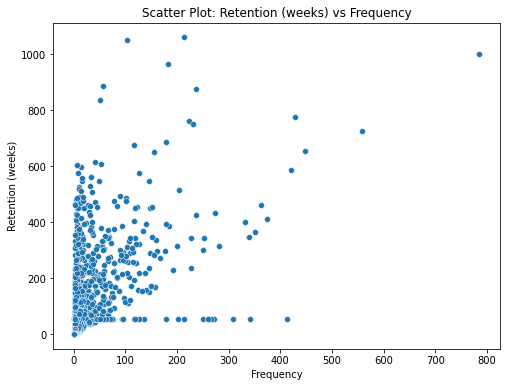

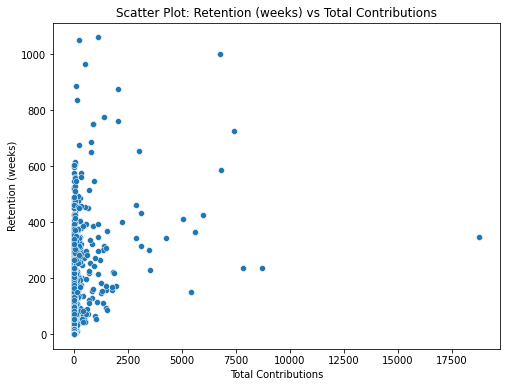

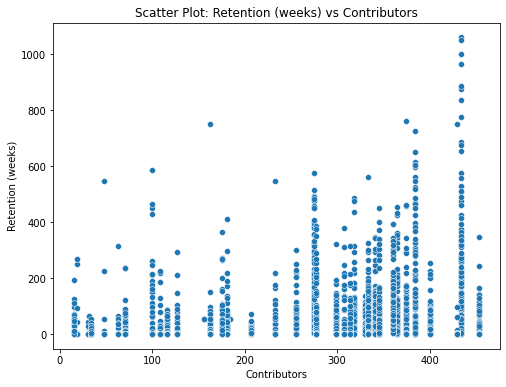

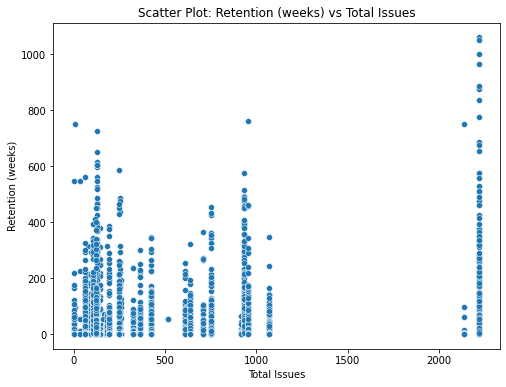

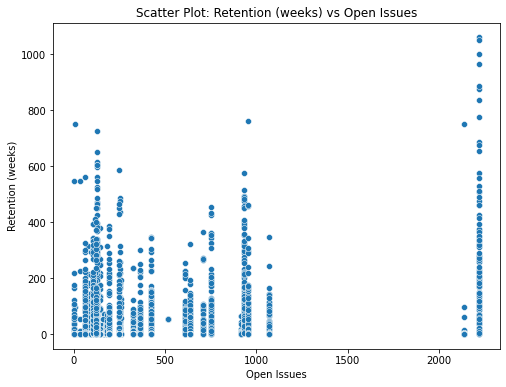

In [60]:
# Select the top 3 correlated factors for scatter plots
top_factors = strong_correlations.index[1:6]  # Exclude Retention itself

# Plot scatter plots
for factor in top_factors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[factor], y=data['Retention (weeks)'])
    plt.title(f"Scatter Plot: Retention (weeks) vs {factor}")
    plt.xlabel(factor)
    plt.ylabel("Retention (weeks)")
    plt.show()


In [61]:
# Step 5: Interpretation of Results
# Find actionable insights
insights = []
for factor, corr_value in strong_correlations.items():
    if abs(corr_value) > 0.5 and factor != 'Retention (weeks)':  # High correlation
        insights.append(f"Retention is strongly correlated with {factor} (Correlation: {corr_value:.2f})")

print("\nKey Insights:")
for insight in insights:
    print(insight)


Key Insights:
Retention is strongly correlated with Frequency (Correlation: 0.57)


In [62]:
data

,Contributor,First Contribution,Last Contribution,Total Contributions,Frequency,Retention (weeks),Experience,Status,First Activity,Last Activity,...,Stars,Forks,Total Issues,Total Pull Requests,Total Files,Lines of Code,Contributors,Open Issues,Closed Issues,Issue Resolution Ratio (%)
0,geekan,2023-06-25,2024-05-12 00:00:00,530,28,46.0,Experienced,Active,2023-06-25 00:00:00,2024-05-12 00:00:00,...,51546,6082,88,936,1251,179975,116,88,1642,94.913295
1,garylin2099,2023-07-23,2024-10-27 00:00:00,378,54,66.0,Experienced,Active,2023-07-23 00:00:00,2024-10-31 07:03:53,...,51546,6082,88,936,1251,179975,116,88,1642,94.913295
2,better629,2023-07-23,2025-03-09 00:00:00,428,33,85.0,Experienced,Active,2023-07-21 06:44:39,2025-03-11 07:04:07,...,51546,6082,88,936,1251,179975,116,88,1642,94.913295
3,stellaHSR,2023-07-16,2024-04-07 00:00:00,194,24,38.0,Experienced,Active,2023-07-16 00:00:00,2024-04-07 00:00:00,...,51546,6082,88,936,1251,179975,116,88,1642,94.913295
4,seehi,2023-07-23,2025-03-09 00:00:00,268,40,85.0,Experienced,Active,2023-07-22 04:34:05,2025-03-10 05:54:35,...,51546,6082,88,936,1251,179975,116,88,1642,94.913295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,karanjthakkar,2016-05-22,2016-05-22 00:00:00,1,1,0.0,New,Passive,2016-05-22 00:00:00,2016-05-23 12:25:16,...,32289,5009,421,1199,484,355837,163,421,2968,87.577456
3461,joaofnds,2017-01-15,2017-01-15 00:00:00,1,1,0.0,New,Passive,2017-01-15 00:00:00,2017-01-21 19:30:36,...,32289,5009,421,1199,484,355837,163,421,2968,87.577456
3462,JohnH-,2014-06-15,2014-06-15 00:00:00,1,1,0.0,New,Passive,2014-06-15 00:00:00,2014-06-15 00:00:00,...,32289,5009,421,1199,484,355837,163,421,2968,87.577456
3463,jorr-at-google,2017-06-11,2017-06-11 00:00:00,1,1,0.0,New,Passive,2017-06-11 00:00:00,2017-06-12 19:16:06,...,32289,5009,421,1199,484,355837,163,421,2968,87.577456


In [63]:
correlation_matrix = data[['Retention (weeks)', 'Total Contributions', 'Frequency', 'Lifespan (days)', 'Lines of Code', 'Total Pull Requests',
                           'Total Files','Total Issues','Open Issues']].corr(method='pearson')
spearman_corr = data[['Retention (weeks)', 'Total Contributions', 'Frequency', 'Lifespan (days)', 'Lines of Code', 'Total Pull Requests',
                           'Total Files','Total Issues','Open Issues']].corr(method='spearman')

C:\Users\kunja\AppData\Local\Temp\ipykernel_3280\1328801195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[['Retention (weeks)', 'Total Contributions', 'Frequency', 'Lifespan (days)', 'Lines of Code', 'Total Pull Requests',
C:\Users\kunja\AppData\Local\Temp\ipykernel_3280\1328801195.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = data[['Retention (weeks)', 'Total Contributions', 'Frequency', 'Lifespan (days)', 'Lines of Code', 'Total Pull Requests',


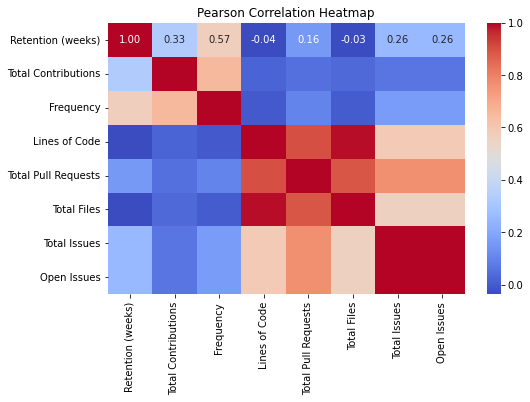

In [64]:
# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [65]:
# 2. t-Test (Experienced vs. New Contributors on Retention)
experienced = data[data['Experience'] == 'Experienced']['Retention (weeks)']
new_contributors = data[data['Experience'] == 'New']['Retention (weeks)']
t_stat, p_value_ttest = stats.ttest_ind(experienced, new_contributors, equal_var=False)
print(t_stat)
print(p_value_ttest)

22.61850712705511
3.922122492016669e-91


In [66]:
# 3. Mann-Whitney U Test (Non-normal Retention Distributions)
mw_stat, p_value_mw = stats.mannwhitneyu(experienced, new_contributors)

In [67]:
# 4. Chi-Square Test (Retention vs. Status - Active/Passive)
contingency_table = pd.crosstab(data['Status'], data['Retention (weeks)'] > data['Retention (weeks)'].median())
chi2_stat, p_value_chi, _, _ = stats.chi2_contingency(contingency_table)

In [68]:
# 5. ANOVA (Retention by Experience Level)
anova_stat, p_value_anova = stats.f_oneway(
    data[data['Experience'] == 'Experienced']['Retention (weeks)'],
    data[data['Experience'] == 'New']['Retention (weeks)']
)

In [69]:
# Display results
print("Pearson Correlation Matrix:\n", correlation_matrix)
print("Spearman Correlation Matrix:\n", spearman_corr)
print(f"t-Test: t={t_stat:.3f}, p={p_value_ttest:.3f}")
print(f"Mann-Whitney U Test: U={mw_stat:.3f}, p={p_value_mw:.3f}")
print(f"Chi-Square Test: chi2={chi2_stat:.3f}, p={p_value_chi:.3f}")
print(f"ANOVA Test: F={anova_stat:.3f}, p={p_value_anova:.3f}")

Pearson Correlation Matrix:
                      Retention (weeks)  Total Contributions  Frequency  \
Retention (weeks)             1.000000             0.328935   0.566510   
Total Contributions           0.328935             1.000000   0.648880   
Frequency                     0.566510             0.648880   1.000000   
Lines of Code                -0.037831             0.022439  -0.004037   
Total Pull Requests           0.156630             0.050308   0.098382   
Total Files                  -0.034038             0.033296   0.001878   
Total Issues                  0.256114             0.059835   0.163057   
Open Issues                   0.256114             0.059835   0.163057   

                     Lines of Code  Total Pull Requests  Total Files  \
Retention (weeks)        -0.037831             0.156630    -0.034038   
Total Contributions       0.022439             0.050308     0.033296   
Frequency                -0.004037             0.098382     0.001878   
Lines of Code   

In [70]:
shapiro_stat, p_shapiro = stats.shapiro(data['Retention (weeks)'])
print(f"Shapiro-Wilk Test for Normality: W={shapiro_stat:.3f}, p={p_shapiro:.3f}")
#If the p-value from the statistical test is less than a predefined threshold (usually 0.05), the null hypothesis is rejected, indicating there is a significant effect or relationship.
#If the p-value is greater than the threshold, the null hypothesis is not rejected, suggesting no significant effect or relationship.

Shapiro-Wilk Test for Normality: W=0.547, p=0.000


In [71]:
levene_stat, p_levene = stats.levene(experienced, new_contributors)
print(f"Levene's Test for Equal Variance: W={levene_stat:.3f}, p={p_levene:.3f}")


Levene's Test for Equal Variance: W=804.820, p=0.000


In [72]:
data['High Retention'] = (data['Retention (weeks)'] > data['Retention (weeks)'].median()).astype(int)

In [73]:
high_retention = data[data['High Retention'] == 1]['Retention (weeks)']
low_retention = data[data['High Retention'] == 0]['Retention (weeks)']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(high_retention, low_retention)
print(f"t-test p-value: {p_value}")

# If p-value < 0.05, there is a significant difference in retention between high and low retention groups

t-test p-value: 7.81307826436705e-216


In [74]:
# Perform Mann-Whitney U test (for non-normally distributed data)
u_stat, p_value_u = stats.mannwhitneyu(high_retention, low_retention)
print(f"Mann-Whitney U test p-value: {p_value_u}")

# If p-value < 0.05, there is a significant difference in retention between the groups

Mann-Whitney U test p-value: 0.0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [76]:
features = ['Total Contributions', 'Frequency']
X = data[features]
y = data['High Retention']


In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [79]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [81]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

In [82]:
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.810
Precision: 0.982
Recall: 0.626
ROC-AUC Score: 0.882
Confusion Matrix:
[[347   4]
 [128 214]]


In [83]:
correlation_matrix = data[['Retention (weeks)', 'Total Contributions', 'Frequency']].corr(method='pearson')
spearman_corr = data[['Retention (weeks)', 'Total Contributions', 'Frequency']].corr(method='spearman')

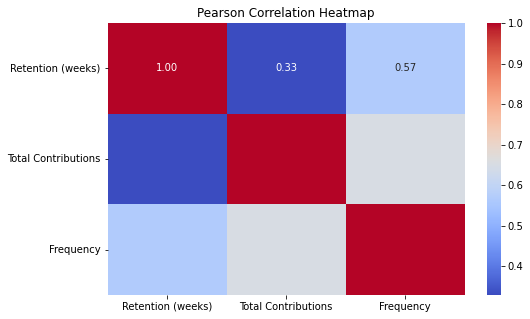

In [84]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [85]:
experienced = data[data['Experience'] == 'Experienced']['Retention (weeks)']
new_contributors = data[data['Experience'] == 'New']['Retention (weeks)']
t_stat, p_value_ttest = stats.ttest_ind(experienced, new_contributors, equal_var=False)

In [86]:
mw_stat, p_value_mw = stats.mannwhitneyu(experienced, new_contributors)

In [87]:
contingency_table = pd.crosstab(data['Status'], data['Retention (weeks)'] > data['Retention (weeks)'].median())

In [88]:
chi2_stat, p_value_chi, _, _ = stats.chi2_contingency(contingency_table)

In [89]:
anova_stat, p_value_anova = stats.f_oneway(
    data[data['Experience'] == 'Experienced']['Retention (weeks)'],
    data[data['Experience'] == 'New']['Retention (weeks)'])

In [90]:
print("Pearson Correlation Matrix:\n", correlation_matrix)
print("Spearman Correlation Matrix:\n", spearman_corr)
print(f"t-Test: t={t_stat:.3f}, p={p_value_ttest:.3f}")
print(f"Mann-Whitney U Test: U={mw_stat:.3f}, p={p_value_mw:.3f}")
print(f"Chi-Square Test: chhi2={chi2_stat:.3f}, p={p_value_chi:.3f}")
print(f"ANOVA Test: F={anova_stat:.3f}, p={p_value_anova:.3f}")

Pearson Correlation Matrix:
                      Retention (weeks)  Total Contributions  Frequency
Retention (weeks)             1.000000             0.328935    0.56651
Total Contributions           0.328935             1.000000    0.64888
Frequency                     0.566510             0.648880    1.00000
Spearman Correlation Matrix:
                      Retention (weeks)  Total Contributions  Frequency
Retention (weeks)             1.000000             0.716793   0.810974
Total Contributions           0.716793             1.000000   0.873948
Frequency                     0.810974             0.873948   1.000000
t-Test: t=22.619, p=0.000
Mann-Whitney U Test: U=1873322.500, p=0.000
Chi-Square Test: chhi2=848.883, p=0.000
ANOVA Test: F=1116.768, p=0.000
